In [ ]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import rioxarray as rxr
import matplotlib.pyplot as plt
import geopandas as gpd

import sys

sys.path.insert(1, "home/jovyan/dev/Tools/")
from dea_tools.plotting import rgb


In [ ]:
input_dir = "/home/jovyan/gdata1/projects/fc-sub-annual/results/tiles/"


In [ ]:
test_cog = os.path.join(
    input_dir, "x148y166/2024_03_monthly_fc_blended_medians_x148y166.tif"
)

da = rxr.open_rasterio(test_cog)


In [ ]:
da


<xarray.DataArray (band: 5, y: 375, x: 372)> Size: 6MB
[697500 values with dtype=float64]
Coordinates:
  * band         (band) int64 40B 1 2 3 4 5
  * x            (x) float64 3kB 3.304e+05 3.305e+05 ... 3.415e+05 3.416e+05
  * y            (y) float64 3kB -1.578e+06 -1.578e+06 ... -1.59e+06 -1.59e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     nan
    scale_factor:   1.0
    add_offset:     0.0

In [ ]:
test_cdf = os.path.join(
    input_dir, "x148y166/monthly_fc_blended_medians_2024-03-01-2024-05-31_x148y166.nc"
)

da_cdf = xr.open_dataset(test_cdf)


In [ ]:
da_cdf


<xarray.Dataset> Size: 412kB
Dimensions:      (year: 1, month: 3, y: 76, x: 75)
Coordinates:
  * year         (year) datetime64[ns] 8B 1970-01-01T00:33:44
  * month        (month) datetime64[ns] 24B 1970-01-01T00:00:03 ... 1970-01-0...
  * y            (y) float64 608B -1.583e+06 -1.583e+06 ... -1.585e+06
  * x            (x) float64 600B 3.349e+05 3.349e+05 ... 3.371e+05 3.371e+05
    spatial_ref  int32 4B ...
Data variables:
    BS           (y, x, year, month) float32 68kB ...
    PV           (y, x, year, month) float32 68kB ...
    NPV          (y, x, year, month) float32 68kB ...
    UE           (y, x, year, month) float32 68kB ...
    obs_count    (year, month, y, x) float64 137kB ...
Attributes:
    date_created:           2025-08-19T06:14:05.406894
    Conventions:            CF-1.6, ACDD-1.3
    history:                NetCDF-CF file created by datacube version '1.8.2...
    geospatial_bounds:      POLYGON ((135.08393274441616 -14.883641228269402,...
    geospatial_bounds_crs:  EPSG:4326
    geospatial_lat_min:     -14.904428878970679
    geospatial_lat_max:     -14.883144254776308
    geospatial_lat_units:   degrees_north
    geospatial_lon_min:     135.08393274441616
    geospatial_lon_max:     135.10515651676005
    geospatial_lon_units:   degrees_east

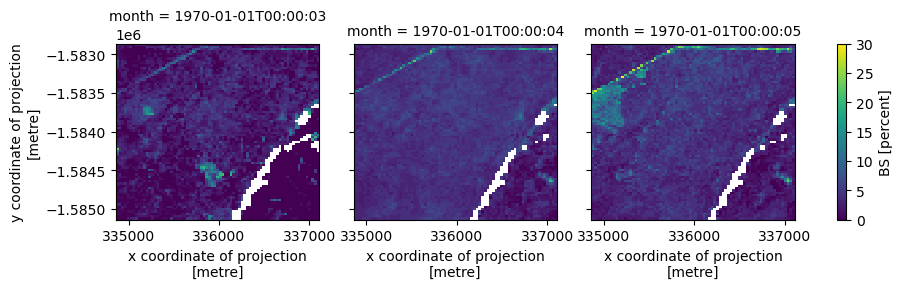

In [ ]:
bs_cdf = da_cdf.BS

bs_cdf.plot(col="month")


In [ ]:
test_modis = xr.open_dataset(
    "https://thredds.nci.org.au/thredds/dodsC/tc43/modis-fc/v310/tiles/monthly/cover/FC_Monthly_Medoid.v310.MCD43A4.h01v11.2018.006.nc"
)


In [ ]:
test_modis


<xarray.Dataset> Size: 1GB
Dimensions:     (time: 12, x: 2400, y: 2400)
Coordinates:
  * time        (time) datetime64[ns] 96B 2018-01-01 2018-02-01 ... 2018-12-01
  * x           (x) float64 19kB -1.89e+07 -1.89e+07 ... -1.779e+07 -1.779e+07
  * y           (y) float64 19kB -2.224e+06 -2.225e+06 ... -3.335e+06 -3.336e+06
Data variables:
    sinusoidal  |S64 64B ...
    phot_veg    (time, y, x) float32 276MB ...
    nphot_veg   (time, y, x) float32 276MB ...
    bare_soil   (time, y, x) float32 276MB ...
    tot_cov     (time, y, x) float32 276MB ...
Attributes: (12/26)
    Conventions:               CF-1.6, ACDD-1.3
    title:                     Fractional cover - MODIS, CSIRO Land and Water...
    summary:                   Vegetation fractional cover represents the exp...
    license:                   Creative Commons BY 4.0 - Rights: Copyright 20...
    id:                        https://doi.org/10.4225/08/5848a3f19a7b3
    creator_name:              CSIRO Land and Water 
    ...                        ...
    references:                Juan P. Guerschman, Peter F. Scarth, Tim R. Mc...
    comment:                   17 Feb 2019: implemented signed datatype(int8)...
    NCO:                       4.4.2
    date_metadata_modified:    20191120T235001
    date_created:              20200117T132610
    DODS.strlen:               0

In [ ]:
test = test_modis.phot_veg.plot(col="time", col_wrap=5, cmap="Greens", vmin=0, vmax=1)


NameError: name 'test_modis' is not defined

array([1, 1, 1])